# Day 2 exercises - Creating `plot_bsd`

Exercise 1. Using your function from Exercise 2 on Sheet 1, write a function which computes the **poor man's $L$-function**

$$f_E(x) = \prod_{p \leq x}\frac{N_p(E)}{p}$$

for a given elliptic curve $E/\mathbb{Q}$ and input $x \in \mathbb{R}$.

In [33]:
    #auxiliary function which only uses primes of good reduction:
    def Emodp(curvedata,prime):
        curve = EllipticCurve(curvedata)
        da = curve.local_data(prime)
        if da.has_bad_reduction():
            return 1
        else: 
            k.<a> = GF(prime)
            E = EllipticCurve(k, curvedata)
            return E.cardinality()
    
    Emodp([0,0,0,-17,1], 3)
    
    #auxiliary function which uses all primes:
    def emodp(E,p):
        curve = EllipticCurve(E)
        return curve.Np(p)
    
    emodp([0,0,0,-17,1], 2)
    
    #poor mans L function over all primes (including bad reduction):
    def poormansLfunction(E,x):
        f=1
        for p in Primes():
            if p<=x:
                f=f*emodp(E, p)/p
            else:
                return f
        return f
    
    poormansLfunction([0,0,0,-17,1],4)
    
    #poor mans L function excluding bad primes:
    def poormansLfunctiononlygood(E,x):
        f=1
        for p in Primes():
            if p<=x:
                f=f*Emodp(E, p)/p
            else:
                return f
        return f
    
    poormansLfunctiononlygood([0,0,0,-17,1],4)
    
    #rounding function:
    def round_up(n, decimals=0):
        multiplier = 10 ** decimals
        return math.ceil(n * multiplier) / multiplier
    
    round_up(poormansLfunctiononlygood([76,123],2000), 5)
    
    

9441/5000

Exercise 2. Create a scatter plot of $f_E(x)$ for various elliptic curves $E$. What patterns can you observe? 

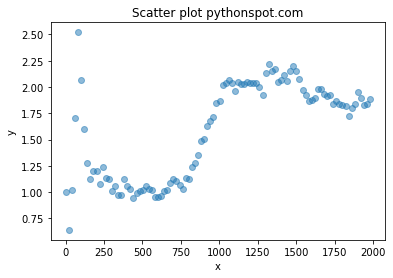

In [34]:
# dummy scatter plot of two points I copied from somewhere:
import matplotlib.pyplot as plt
#s = scatter_plot([[0,1],[2,4],[3.2,6]])
s=scatter_plot([(0, 0), (50, 50)], markersize=100, facecolor='green', xmax=10000)
s


# Scatter plot of poor man's L-function:
import numpy as np
import matplotlib.pyplot as plt
I = range(1,2000,20)
#x
x = I
#L-function
y = [poormansLfunctiononlygood([76,123],i) for i in I]

#Plot
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Exercise 3. Create a scatter plot of $\log(f_E(x))$ against $\log\log(x)$ for various elliptic curves $E$. Ensure that the plot includes other helpful user information such as the bound on $x$ used, the Elliptic curves plotted, and possibly suggestive lines of nearest fit.

In [ ]:
#def plot_bsd(ecs_list, B = 1000):
    """This plots the poor man's L-function for the elliptic curves in ecs_list
    up to the bound B

    Args:
        ecs_list ([EllipticCurve]): List of EllipticCurve objects, all defined
                                    over Q.
        B (int, optional): The bound on primes to take. Defaults to 1000.
    """
    
    # enter your code here :) Feel free to change the function signature
    # if desired
    

Exercise 4. Create a `plot_bsd` function which works for a list of elliptic curves over an arbitrary number field.

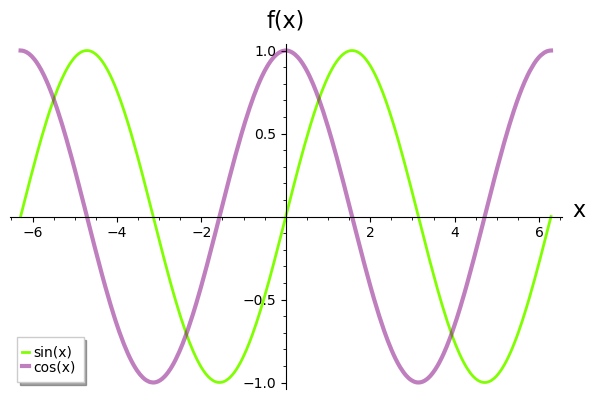

In [9]:
#
p1 = plot(sin, (-2*pi, 2*pi), thickness=2.0, rgbcolor=(0.5, 1, 0),
legend_label='sin(x)')
p2 = plot(cos, (-2*pi, 2*pi), thickness=3.0, color='purple',
alpha=0.5, legend_label='cos(x)')
plt = p1 + p2
plt.axes_labels(['x', 'f(x)'])
show(plt)

Exercise 5. Can you find an elliptic curve $E/\mathbb{Q}$, and four number fields $K_1, K_2, K_3, K_4$ for which the rank of $E(K_i)$ is different for each $i$. Create the BSD plot for these base-changed curves.

In [22]:
def noisy_line(m, b, x):
    return m * x + b + 0.5 * (random() + -0.5)
slope = 1.0
intercept = -0.5
x_coords = [random() for t in range(50)] 
y_coords = [noisy_line(slope, intercept, x) for x in x_coords] 
sp = scatter_plot(zip(x_coords, y_coords))
sp += line([(0.0, intercept), (1.0, slope+intercept)], color='red')
sp.show()

TypeError: float() argument must be a string or a number, not 'zip'

Exercise 6. Why is the **poor man's analytic rank** (the slope of $\log(f_E(x))$ against $\log\log(x)$) equal to the actual analytic rank (order of vanishing at $s=1$ of $L(E/\mathbb{Q},s))?